<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Predicting_Compressive_Strength_of_Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Compressive Strength of Concrete**

In [1]:
!pip install pyforest

In [2]:
from pyforest import*
lazy_imports()

['import os',
 'from sklearn.linear_model import LogisticRegression',
 'import cv2',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.model_selection import KFold',
 'import skimage',
 'from fbprophet import Prophet',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.preprocessing import RobustScaler',
 'from xlrd import open_workbook',
 'import dash',
 'import tqdm',
 'import sys',
 'import statistics',
 'import matplotlib.pyplot as plt',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import statsmodels.api as sm',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.linear_model import Ridge',
 'import nltk',
 'from PIL import Image',
 'from sklearn import metrics',
 'import bokeh',
 'import numpy as np',
 'import torch',
 'import pickle',
 'import altair as alt',

In [3]:
df = pd.read_csv('/content/compresive_strength_concrete+2.csv')

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Observation
  1. It shows that there are eight independent variables(cement, slag, ash,water,superplastic,coarseagg,fineagg,age)and one dependent variable(strength)
  2. All the records are numeric

In [5]:
#df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
#                         'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
#                         'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
#                         'Water (component 4)(kg in a m^3 mixture)':'water',
#                         "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
#                         'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
#                         'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
#                         'Age (day)':'age',
#                         'Concrete compressive strength(MPa, megapascals)':'strength'
# })

Alternatively:

In [6]:
df.columns = ['cement', 'slag', 'ash', 'Water','superplastic','coarseagg','fineagg','age','strength']

In [7]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df.dtypes

cement          float64
slag            float64
ash             float64
Water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [9]:
df.shape

(1030, 9)

In [10]:
#Checking for missing values

df.isnull().sum()

cement          0
slag            0
ash             0
Water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


##**Exploratory Data Analysis**

**CEMENT**

In [12]:
#Quartiles
from scipy import stats

Q1 = df['cement'].quantile(q=0.25)
Q3 = df['cement'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['cement']))

1st Quartile (Q1) is:  192.375
3rd Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [13]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -44.0625
Upper outlier limit in cement:  586.4375


In [14]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in cement upper: ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower: ', df[df['cement']<-44.0625]['cement'].count())

# print('% of Outlier in cement upper: ', round(df[df['cement']>586.4375]['cement'].count()*100/len(df)))
# print('% of Outlier in cement lower: ', round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)))

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='cement'>

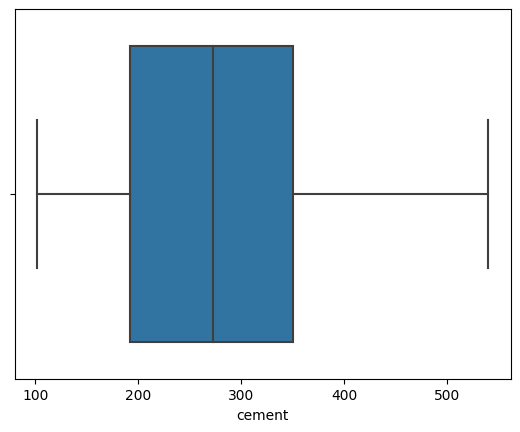

In [15]:
#Distribution of CEMENT

sns.boxplot(x='cement',data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x800 with 0 Axes>

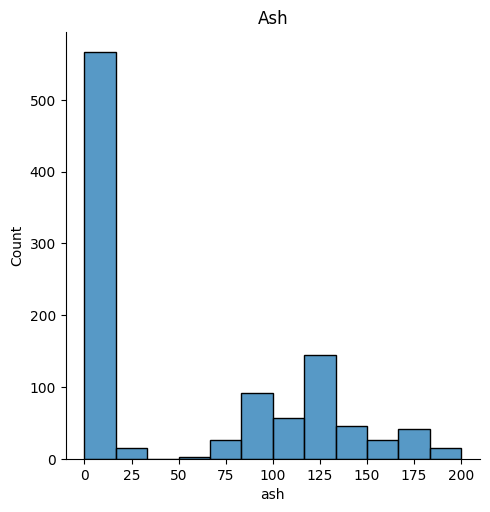

In [16]:
#displot

plt.figure(figsize=(10,8))
sns.displot(df['ash'])
plt.title('Ash')
plt.show()

#**Water**

In [17]:
#Quartiles

w_Q1=df['Water'].quantile(q=0.25)
w_Q3=df['Water'].quantile(q=0.75)

print('1st Quartile (Q1) is: ', w_Q1)
print('3rd Quartile (Q3) is: ', w_Q3)
print('Interquartile range (IQR) is: ', stats.iqr(df['Water']))

1st Quartile (Q1) is:  164.9
3rd Quartile (Q3) is:  192.0
Interquartile range (IQR) is:  27.099999999999994


In [18]:
#Outlier detection from Interquartile range (IQR) in original data

WL_outliers=w_Q1-1.5*(w_Q3-w_Q1)
WU_outliers=w_Q3+1.5*(w_Q3-w_Q1)

print('Lower outlier in water: ',WL_outliers)
print('Upper outlier in water: ',WU_outliers)

Lower outlier in water:  124.25000000000001
Upper outlier in water:  232.64999999999998


In [19]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in water upper: ', df[df['Water']>232.64999999999998]['Water'].count())
print('Number of outliers in water lower: ', df[df['Water']<124.25000000000001]['Water'].count())

# print('% of Outlier in water upper: ', round(df[df['Water']>232.64999999999998]['Water'].count()*100/len(df)))
# print('% of Outlier in water lower: ', round(df[df['Water']<124.25000000000001]['Water'].count()*100/len(df)))

Number of outliers in water upper:  4
Number of outliers in water lower:  5


<IPython.core.display.Javascript object>

<Axes: xlabel='Water'>

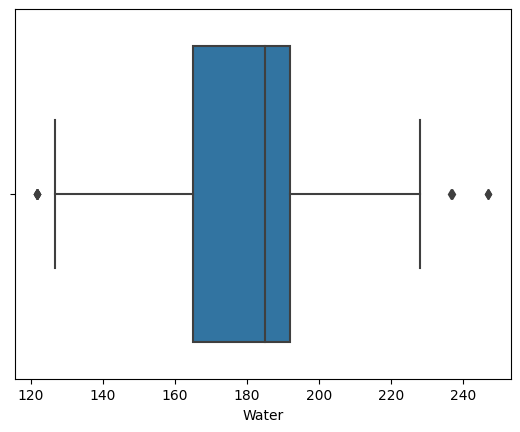

In [20]:
#Distribution of WATER

sns.boxplot(x='Water', data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x800 with 0 Axes>

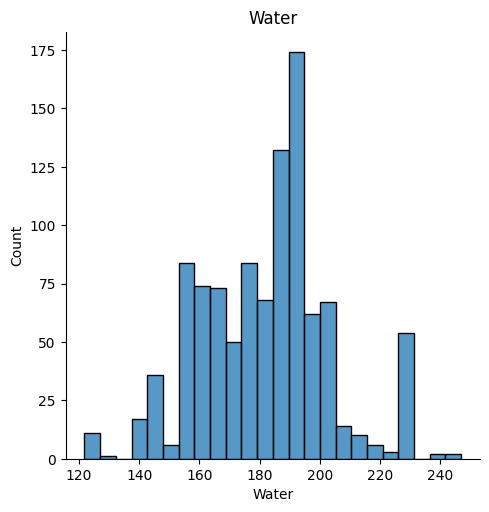

In [21]:
plt.figure(figsize=(10,8))
sns.displot(df['Water'])
plt.title('Water')
plt.show()

#**Slag**

In [22]:
Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)

In [23]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in water: ',L_outliers)
print('Upper outlier in water: ',U_outliers)

Lower outlier in water:  -214.42499999999998
Upper outlier in water:  357.375


In [24]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in slag upper: ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower: ', df[df['slag']<-214.425]['slag'].count())

# print('% of Outlier in slag upper: ', round(df[df['slag']>357.375]['slag'].count()*100/len(df)))
# print('% of Outlier in slag lower: ', round(df[df['slag']<-214.425]['slag'].count()*100/len(df)))

Number of outliers in slag upper:  2
Number of outliers in slag lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='slag'>

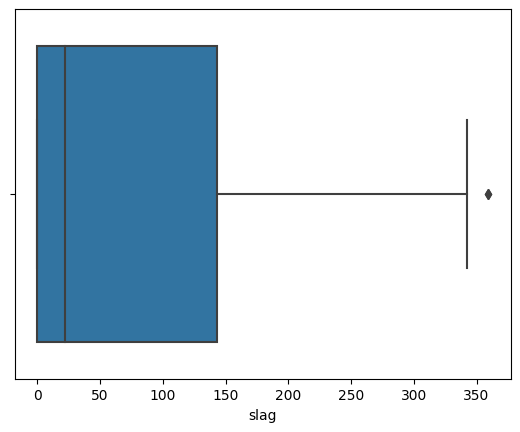

In [25]:
#Distribution of SLAG

sns.boxplot(x='slag', data=df, orient='h')

#**Age**

In [26]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)

In [27]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in age: ',L_outliers)
print('Upper outlier in age: ',U_outliers)

Lower outlier in age:  -66.5
Upper outlier in age:  129.5


In [28]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in age upper: ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower: ', df[df['age']<-66.5]['age'].count())

Number of outliers in age upper:  59
Number of outliers in age lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='age'>

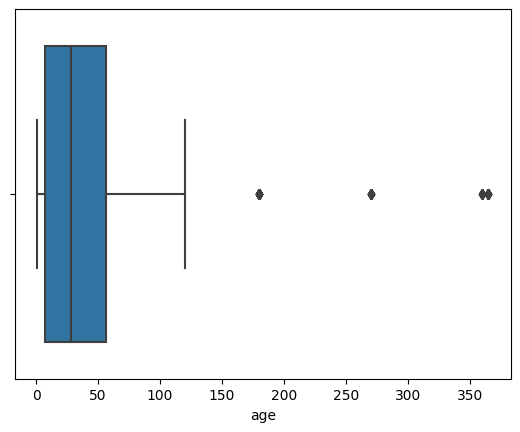

In [29]:
#Distribution of AGE

sns.boxplot(x='age', data=df, orient='h')

#**Ash**

In [30]:
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)

In [31]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  -177.45
Upper outlier in ash:  295.75


In [32]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in ash upper: ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower: ', df[df['ash']<-177.45]['ash'].count())

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='ash'>

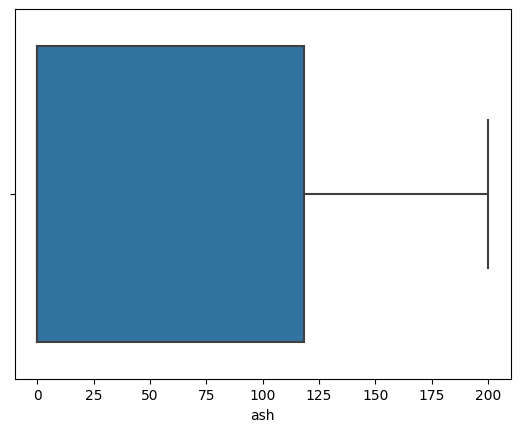

In [33]:
#Distribution of AGE

sns.boxplot(x='ash', data=df, orient='h')

#**MultiVaariate Analysis**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

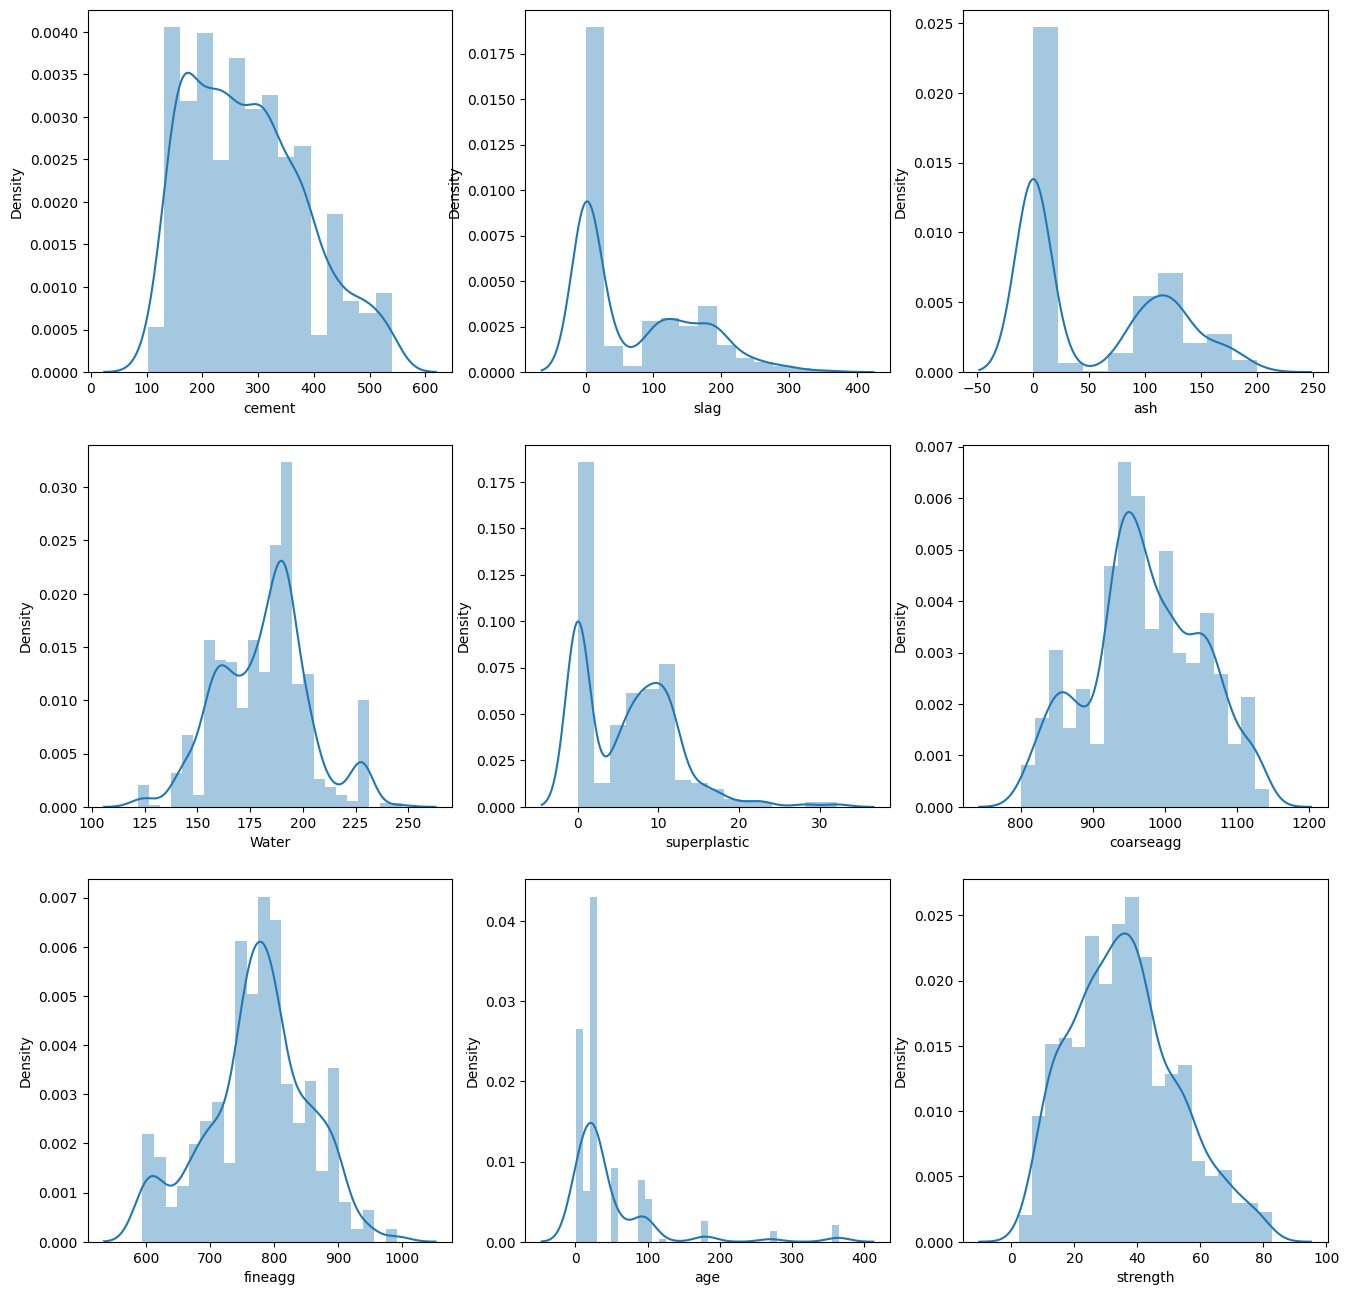

In [34]:
import warnings
warnings.filterwarnings("ignore")
#Displot

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['Water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])
plt.show()

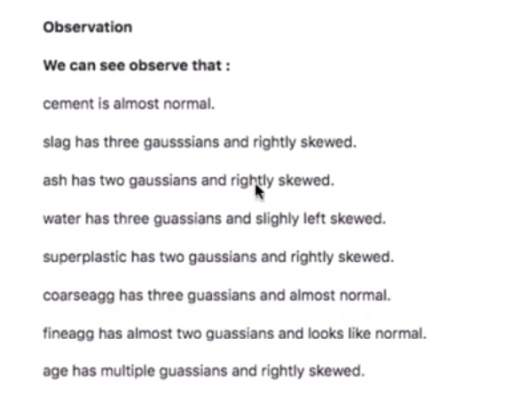

<IPython.core.display.Javascript object>

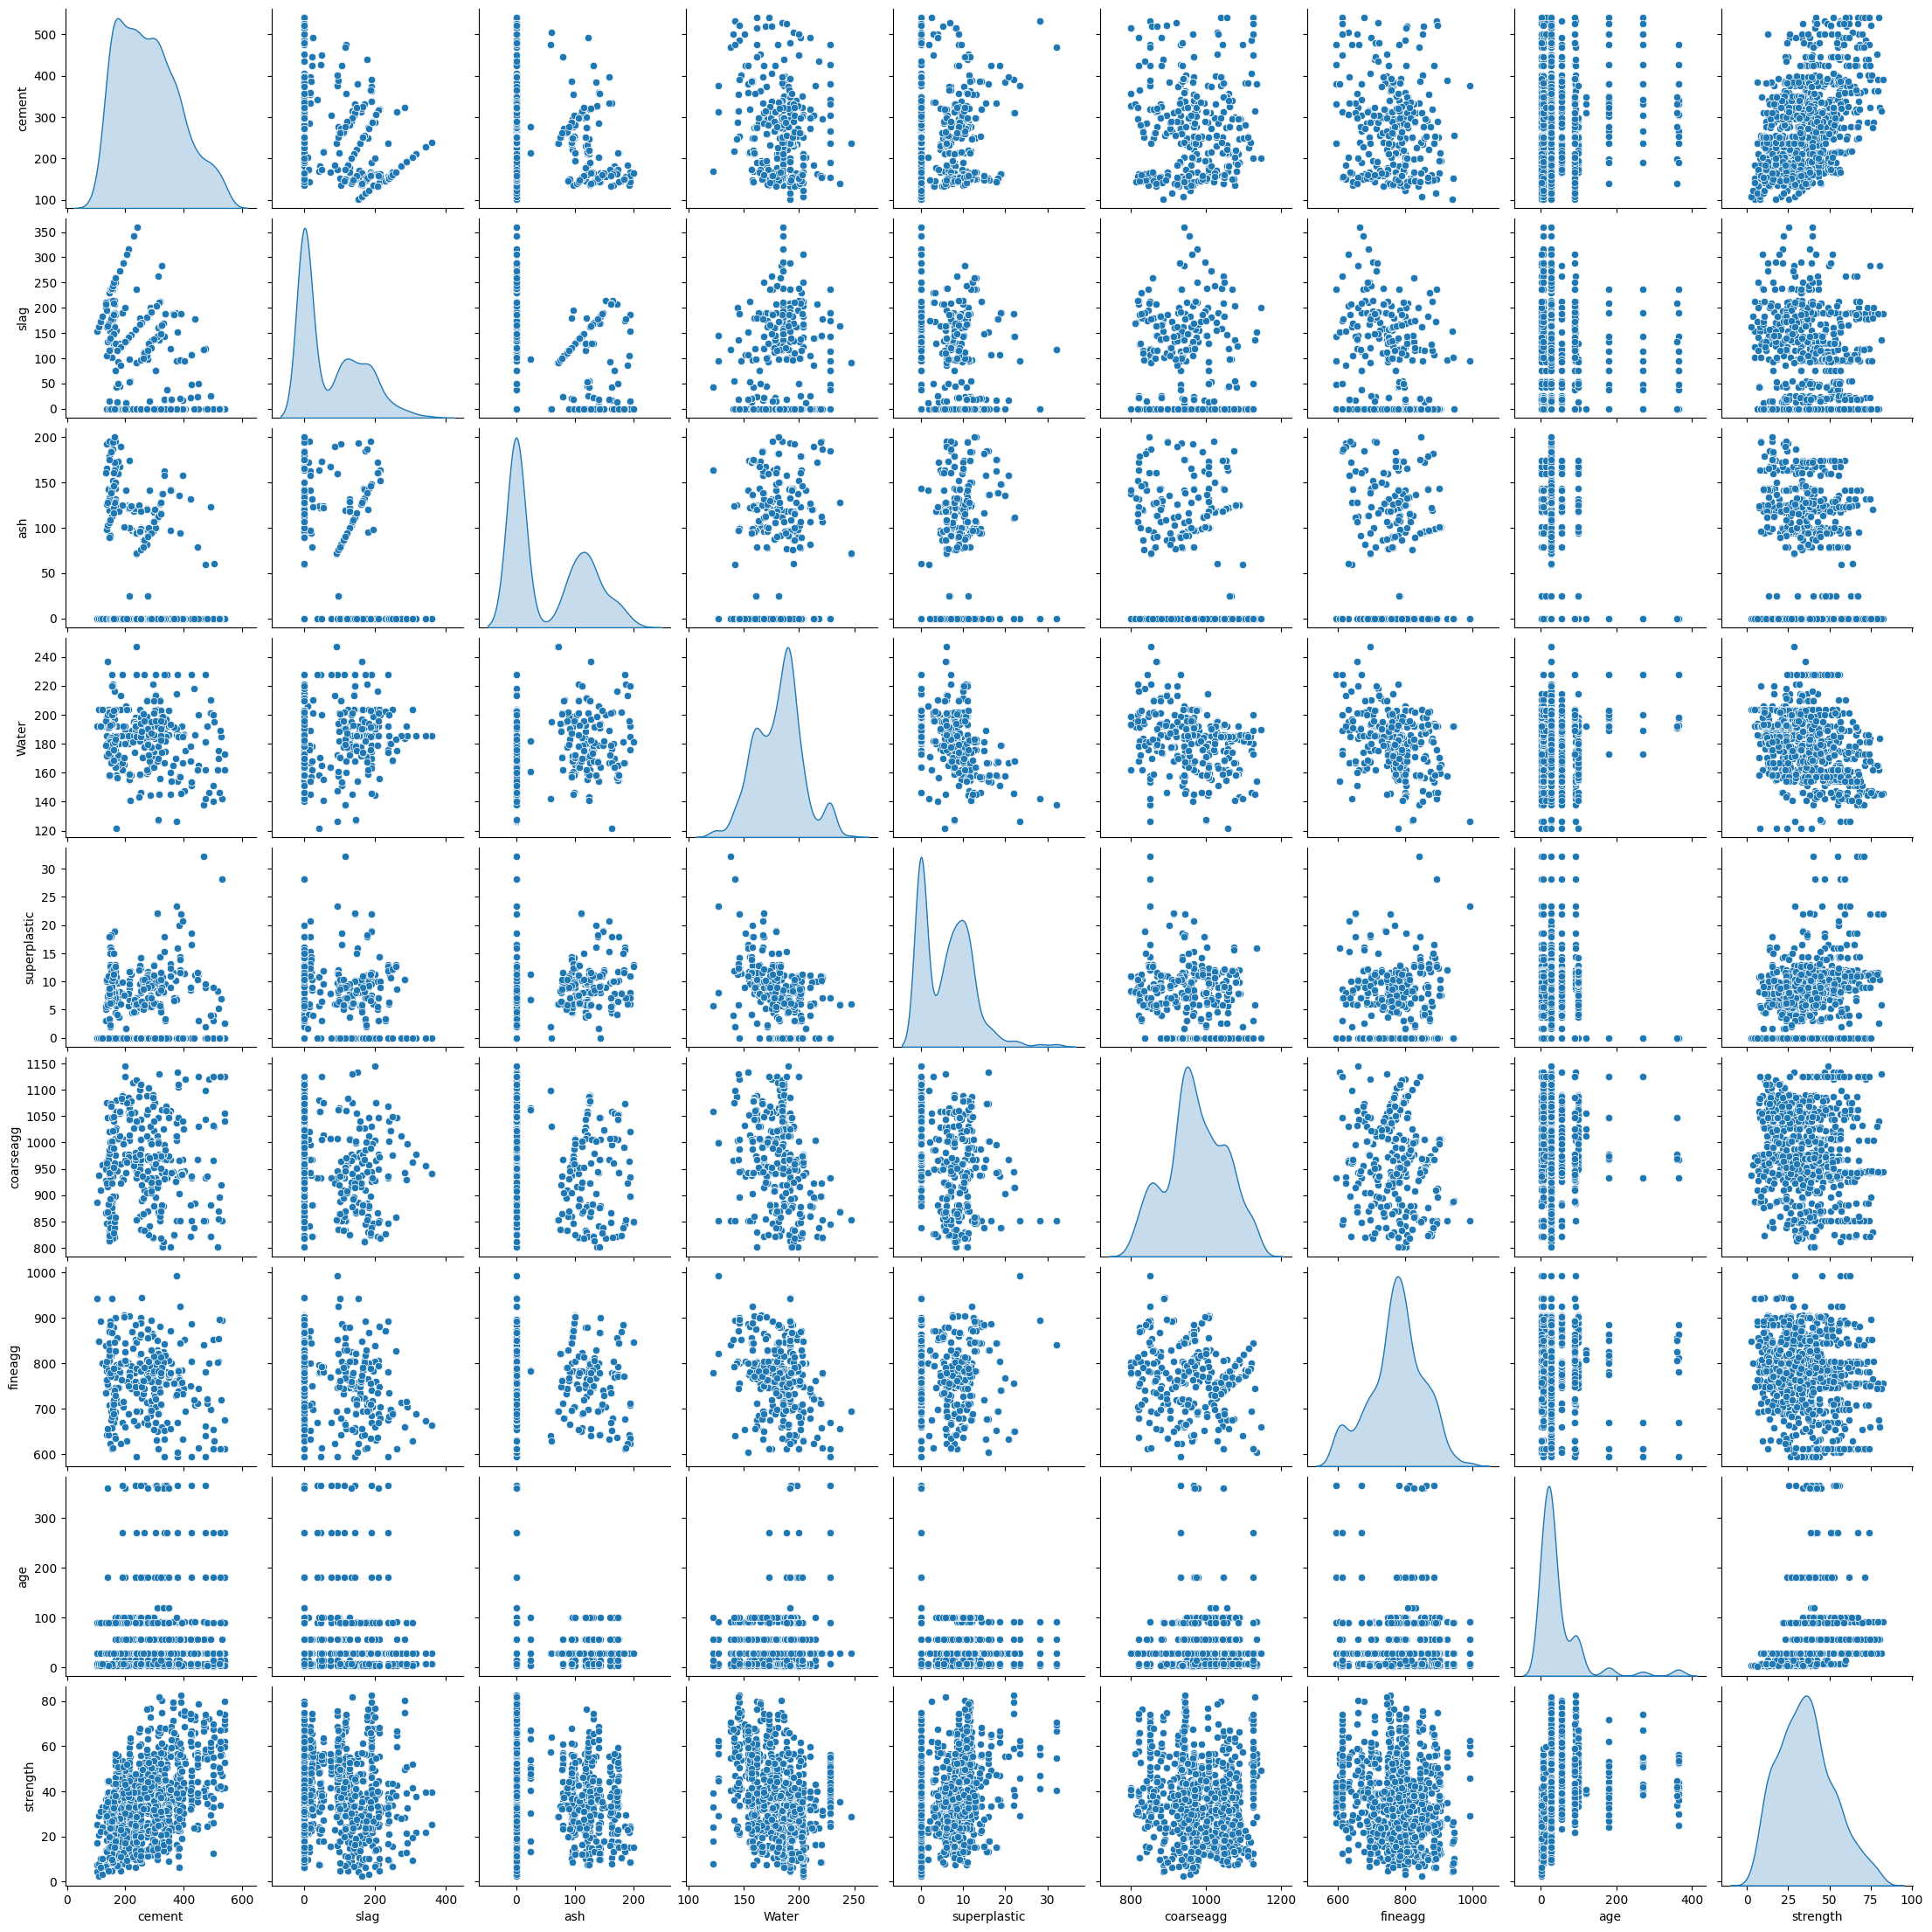

In [35]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df, diag_kind='kde')

###**Correlation between variables**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

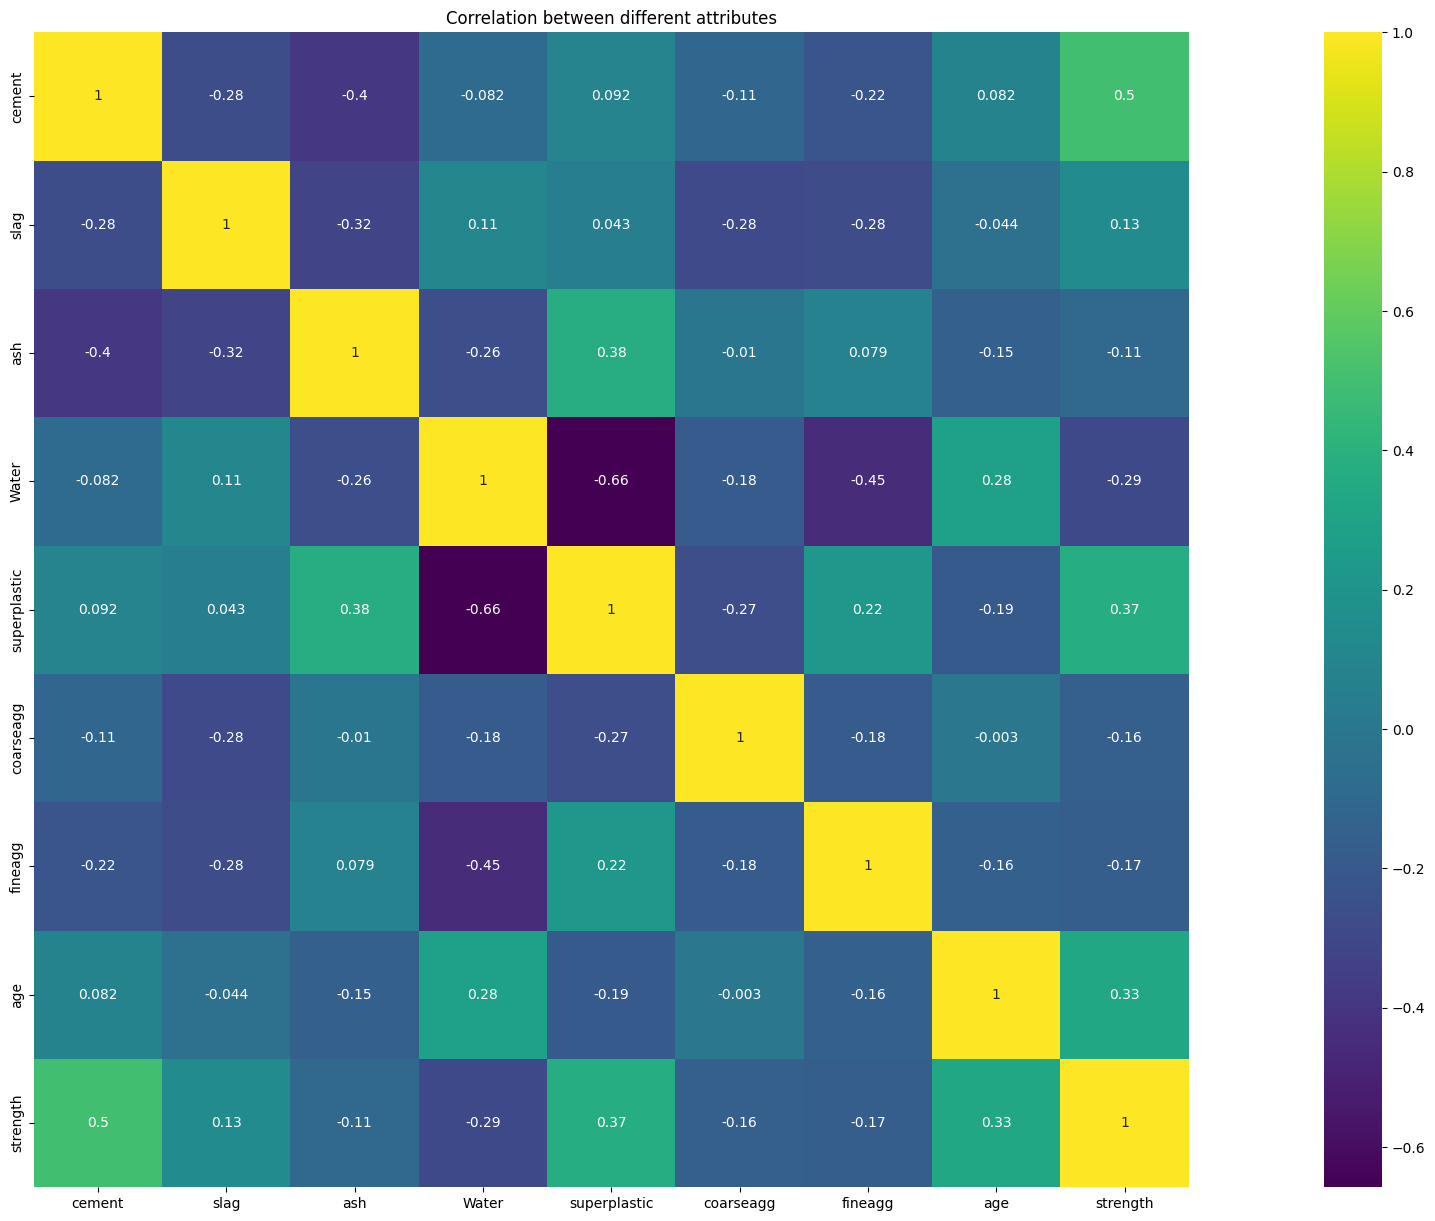

In [36]:
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<Axes: >

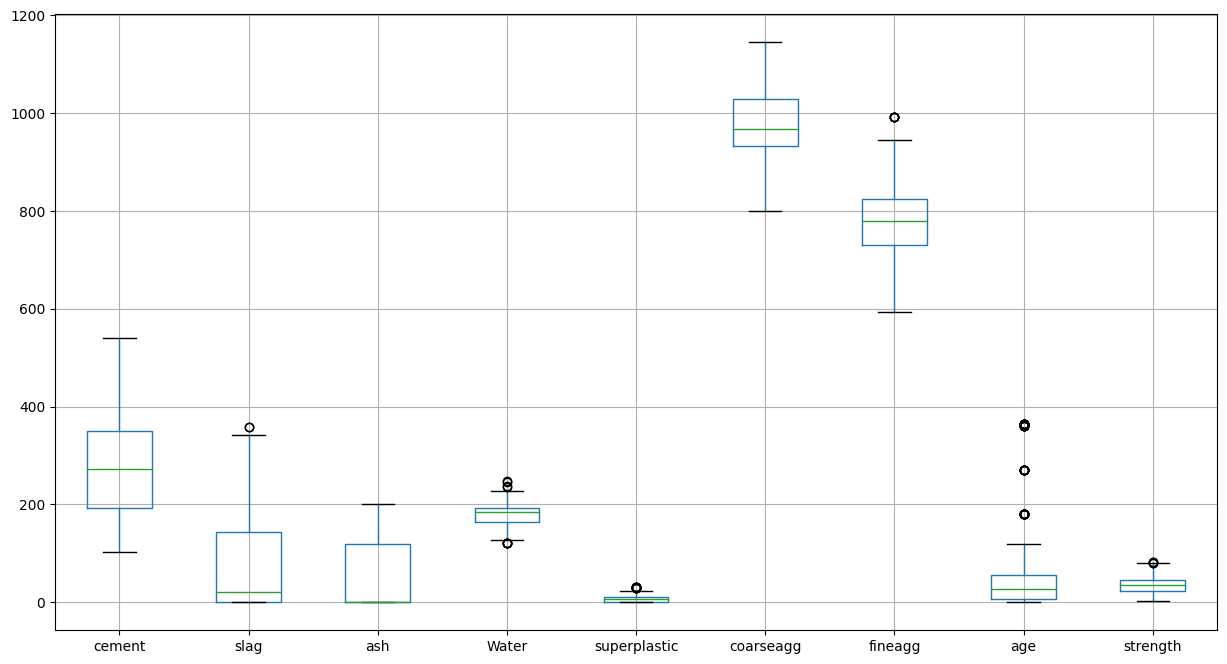

In [37]:
df.boxplot(figsize=(15,8))

##**Checking for outliers**

In [38]:
print('Outliers in cement: ', df[((df.cement - df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', df[((df.slag - df.slag.mean())/df.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', df[((df.ash - df.ash.mean())/df.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', df[((df.Water - df.Water.mean())/df.Water.std()).abs()>3]['Water'].count())
print('Outliers in superplastic: ', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ', df[((df.coarseagg - df.coarseagg.mean())/df.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', df[((df.age - df.age.mean())/df.age.std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


##**Replacing the outliers by median**

In [39]:
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

In [40]:
df.loc[(df['cement'] < low) | (df['cement'] > high)]

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<Axes: >

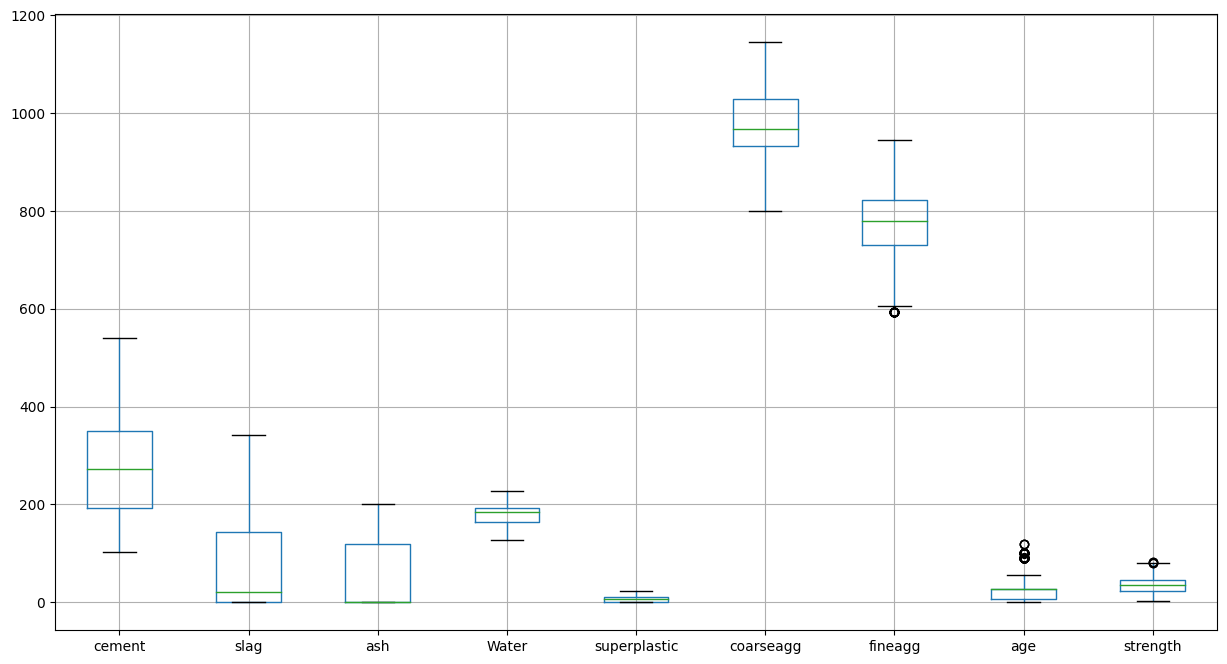

In [41]:
df.boxplot(figsize=(15,8))

#**Feature Engineering and Model Building**

In [42]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [43]:
#Splitting the data into independent and dependent attributes


#independent and dependent variables
X = df.drop('strength', axis = 1)
y = df['strength']

In [44]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

<IPython.core.display.Javascript object>

In [45]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

<IPython.core.display.Javascript object>

#**Building different Models**

###**Random Forest**

In [46]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [47]:
y_pred = model.predict(X_test)

In [48]:
#Model Performance on Training Data

model.score(X_train, y_train)

# round(model.score(X_train, y_train)*100) #if you want to get the exact percentage, uncomment this one

0.9811344603263784

In [49]:
#Model Performance on Test Data

model.score(X_test, y_test)

# round(model.score(X_test, y_test)*100) #if you want to get the exact percentage, uncomment this one

0.8784070646536414

In [50]:
#Same as above
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.8784070646536414

In [51]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

31.870383703453466

In [52]:
#Store the accuracy results for each model in a dataframe for final comparison

results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': acc_R}, index=[1])
results = results_1[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407


#**KFold Cross Validation**

In [53]:
k = 20

kfold = KFold(n_splits=k, shuffle=True)
K_results = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9053740409154992

In [54]:
#Store the accuracy results for each model in a dataframe for final comparison

random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index=[2])
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374


#**Gradient Boosting Regressor**

In [55]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [56]:
y_pred = model.predict(X_test)

In [57]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.9477368610390589

In [58]:
#Model Performance on Test Data

model.score(X_test, y_test)

0.8802296825497287

In [59]:
#Same as above, you can also store the above in a variable and use without doing the following.
acc_G=metrics.r2_score(y_test, y_pred)
acc_G

<IPython.core.display.Javascript object>

0.8802296825497287

In [60]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

31.392662431838296

In [61]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'accuracy': acc_G},index=[3])
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230


In [62]:
k = 20

kfold = KFold(n_splits=k)
results_3 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_3))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7696724512639473

In [63]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy},index=[4])
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672


#**Ada Boost Regressor**

In [64]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [66]:
y_pred = model.predict(X_test)

In [67]:
#Model Performance on Test Data, NB: check on train data

model.score(X_test, y_test)

0.7518518456920842

NB: the performance might vary when you run the notebook, that's a normal scenario

In [68]:
#Same as above, you can also store the above in a variable and use without doing the following.
acc_Ada=metrics.r2_score(y_test, y_pred)
acc_Ada

<IPython.core.display.Javascript object>

0.7518518456920842

In [69]:
#Store the accuracy results for each model in a dataframe for final comparison

acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': acc_Ada},index=[5])
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852


##**K fold cross Validation for Ada Boost**

In [70]:
k = 20

kfold = KFold(n_splits=k)
results_4 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_4))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5883059245582298

In [71]:
#Store the accuracy results for each model in a dataframe for final comparison

acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': accuracy},index=[6])
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306


#**KNN Regressor**

In [72]:
#Checking for different values of neighbors to determine K
from sklearn.neighbors import KNeighborsRegressor


diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  diff_k.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

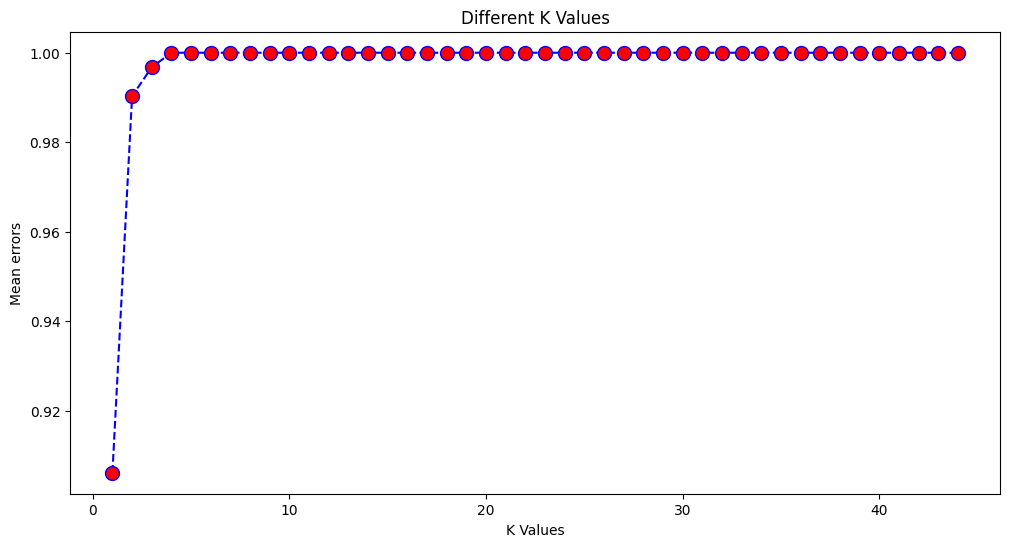

In [73]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [74]:
#k=3 is a better choice from the above plot

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [75]:
y_pred = model.predict(X_test)

In [76]:
model.score(X_train, y_train)

0.9072386489998584

In [77]:
acc_KNN=metrics.r2_score(y_test, y_pred)
acc_KNN

<IPython.core.display.Javascript object>

0.7541705172196024

In [78]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

64.43367716648686

In [79]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN]}, index=[7])
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171


##**KFold Validation**

In [80]:
k = 20

kfold = KFold(n_splits=k)
results_5 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_5))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6913851078857276

In [81]:
#Store the accuracy results for each model in a dataframe for final comparison

KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': accuracy},index=[8])
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385


##**Bagging Reggressor**

In [82]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [83]:
y_pred = model.predict(X_test)

In [84]:
model.score(X_train, y_train)

0.9743565761698397

In [85]:
model.score(X_test, y_test)

0.8463068217601872

In [86]:
acc_BR=metrics.r2_score(y_test, y_pred)
acc_BR

<IPython.core.display.Javascript object>

0.8463068217601872

In [87]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

40.28408845590705

In [88]:
#Store the accuracy results for each model in a dataframe for final comparison

Bagging_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': acc_BR},index=[9])
results = pd.concat([results, Bagging_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.846307


##**KFold Validation**

In [89]:
k = 20

kfold = KFold(n_splits=k)
results_7 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_7))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7584817637870269

In [90]:
#Store the accuracy results for each model in a dataframe for final comparison

BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy},index=[10])
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.846307
10,Bagging Regressor k fold,0.758482


##**Support Vector Regressor**

In [91]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [92]:
y_pred = model.predict(X_test)

In [93]:
model.score(X_train, y_train)

0.7296525761559518

In [94]:
acc_SVR=metrics.r2_score(y_test, y_pred)
acc_SVR

<IPython.core.display.Javascript object>

0.6549962611822544

In [95]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

90.42796363067555

In [96]:
#Store the accuracy results for each model in a dataframe for final comparison

SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR},index=[11])
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.846307
10,Bagging Regressor k fold,0.758482


#**KFold for SVR**

In [97]:
k = 20

kfold = KFold(n_splits=k)
results_8 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_8))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6155301658292511

In [98]:
#Store the accuracy results for each model in a dataframe for final comparison

SVRKFold_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor k fold'], 'accuracy': accuracy}, index=[12])
results = pd.concat([results, SVRKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.846307
10,Bagging Regressor k fold,0.758482


##**XGBoost Regressor**

In [99]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()

xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [100]:
y_pred = xgr.predict(X_test)

In [101]:
xgr.score(X_train, y_train)

0.9924341146964205

In [102]:
acc_XGB=metrics.r2_score(y_test, y_pred)
acc_XGB

<IPython.core.display.Javascript object>

0.9004226612596836

In [103]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

26.09993734243447

In [104]:
#Store the accuracy results for each model in a dataframe for final comparison

XGB_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': [acc_XGB]},index=[13])
results = pd.concat([results, XGB_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.846307
10,Bagging Regressor k fold,0.758482


#**DesionTreeRegressor**

In [105]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [106]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.309419
slag            0.059447
ash             0.008596
Water           0.124673
superplastic    0.046320
coarseagg       0.027429
fineagg         0.051148
age             0.372967


As we can see, **Cement, Age** and **Water** are the most important features

In [107]:
y_pred = dec_model.predict(X_test)

In [108]:
dec_model.score(X_train, y_train)

0.9930841416603411

In [109]:
dec_model.score(X_test, y_test)

0.7736107306631951

In [110]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

<IPython.core.display.Javascript object>

0.7736107306631951

In [111]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'accuracy': [acc_DT]},index=[14])
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.846307
10,Bagging Regressor k fold,0.758482


#**KFold for Decision Tree Regressor**

In [112]:
k = 20

kfold = KFold(n_splits=k)
results_9 = cross_val_score(dec_model, X, y, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6023156319023311

In [113]:
#Store the accuracy results for each model in a dataframe for final comparison

DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor k fold'], 'accuracy': accuracy},index=[15])
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.846307
10,Bagging Regressor k fold,0.758482


#**Feature Selection**

In [114]:
df2 = df.copy() #create a copy of df in order to drop the least important features and work on only the important features

In [115]:
X = df2.drop(['strength','ash','coarseagg','fineagg'],axis=1)
y = df2['strength']
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [116]:
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [117]:
decNew_Model = DecisionTreeRegressor()
decNew_Model.fit(X_train, y_train)

DecisionTreeRegressor()

In [118]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(decNew_Model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.351791
slag            0.073999
Water           0.138111
superplastic    0.059297
age             0.376802


In [119]:
y_pred = decNew_Model.predict(X_test)

In [120]:
decNew_Model.score(X_train, y_train)

0.9911889880235539

In [121]:
decNew_Model.score(X_test, y_test)

0.7526781559587841

In [122]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

<IPython.core.display.Javascript object>

0.7526781559587841

In [123]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2'], 'accuracy': [acc_DT]},index=[16])
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.846307
10,Bagging Regressor k fold,0.758482


In [124]:
#Let's create our training and testing data again since it has been overriden

X=df.drop('strength',axis=1)
y=df['strength']

In [125]:
Xscaled=X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=df.columns)

<IPython.core.display.Javascript object>

In [126]:
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(Xscaled,y, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [127]:
dec_prun_model=DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)
dec_prun_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [128]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.355615
slag            0.000000
ash             0.000000
Water           0.106034
superplastic    0.035409
coarseagg       0.000000
fineagg         0.025055
age             0.477887


#**Plotting The Decision Tree**

In [129]:
!pip install graphviz

In [130]:
!pip install pydot

In [131]:
!pip install six

In [132]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [133]:
Xscaled_df=Xscaled_df.drop('strength',axis=1)
feature_cols = Xscaled_df.columns

In [134]:
feature_cols

Index(['cement', 'slag', 'ash', 'Water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

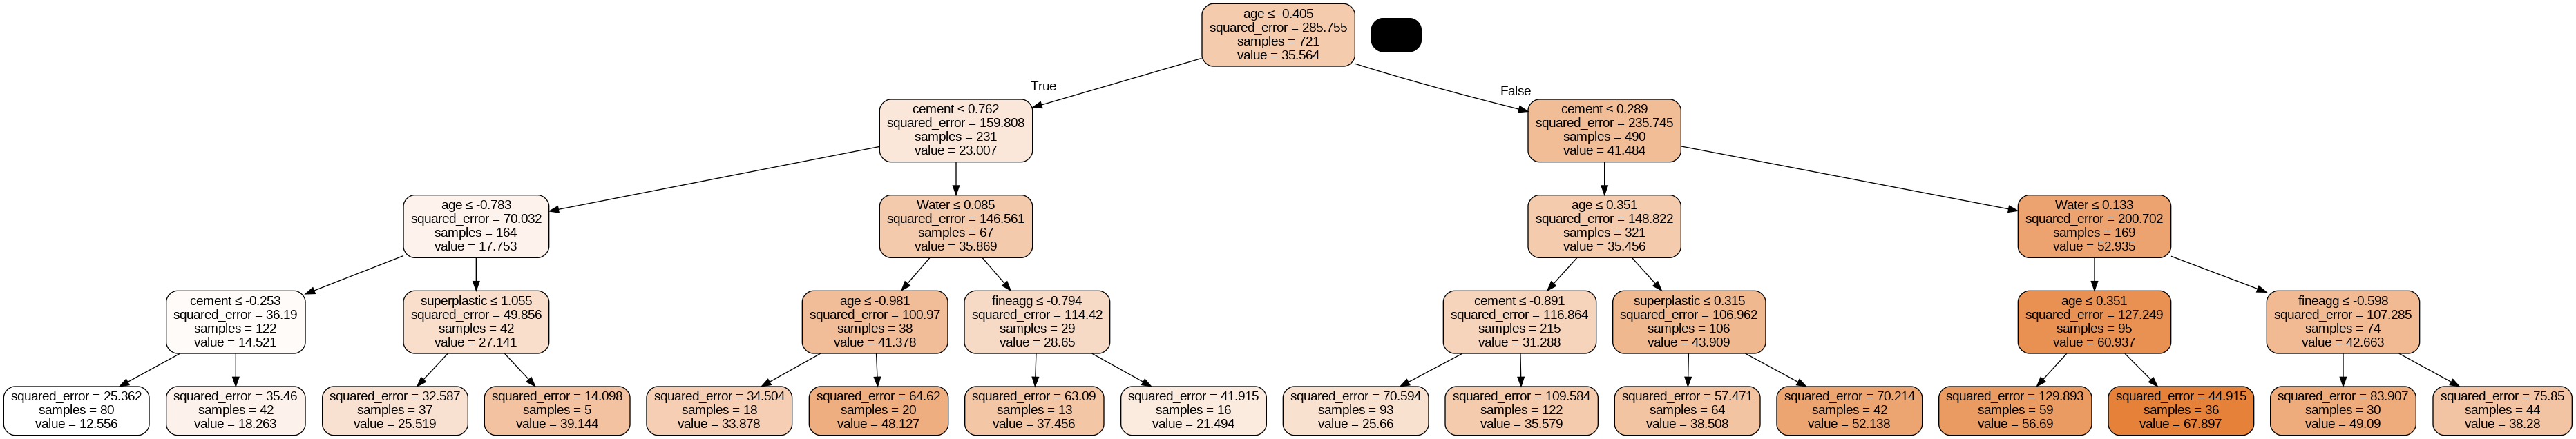

In [135]:
dot_data = StringIO()
export_graphviz(dec_prun_model,out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [136]:
y_pred = dec_prun_model.predict(X_test)

In [137]:
#On Training data
dec_prun_model.score(X_train, y_train)

0.7578225840644413

In [138]:
#On testing data

dec_prun_model.score(X_test, y_test)

0.556820999525816

In [139]:
acc_DecT=metrics.r2_score(y_test, y_pred)
acc_DecT

<IPython.core.display.Javascript object>

0.556820999525816

In [140]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

116.16040647585388

In [141]:
#Store the accuracy results for each model in a dataframe for final comparison

DecT_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree'], 'accuracy': [acc_DecT]},index=[17])
results = pd.concat([results, DecT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.846307
10,Bagging Regressor k fold,0.758482


#**KFold for Pruned Decision Tree**

In [142]:
k = 20

kfold = KFold(n_splits=k)
results_10 = cross_val_score(dec_prun_model, X, y, cv=kfold)
accuracy=np.mean(abs(results_10))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.44792037352404224

In [143]:
#Store the accuracy results for each model in a dataframe for final comparison

decKFold_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree k fold'], 'accuracy': accuracy},index=[18])
results = pd.concat([results, decKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878407
2,Random Forest Regressor k_fold,0.905374
3,Gradient Boost Regressor,0.880230
4,Gradient Boost Regressor k fold,0.769672
5,Ada Boost Regressor,0.751852
6,Ada Boost Regressor k fold,0.588306
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.846307
10,Bagging Regressor k fold,0.758482


**Gradient Boost Regressor, Support Vector Regressor, Bagging Regressor, Support Vector Regressor** and **Random Forest**   seems to do well in the scenario. We can choose either of them.

*NB: You can again drop the features that are not important and rebuild the models again(consider doing hyperparameter tuning using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))*